The goal here is to detect whether or not a given time series has an intrinsic trend (for example a linear trend). If not, then we say that the time series is stationary (and maybe mean reverting?). Once we assess a certain time series is stationary, we can proceed to distinguish brownian fluctuations from oscillatory trends

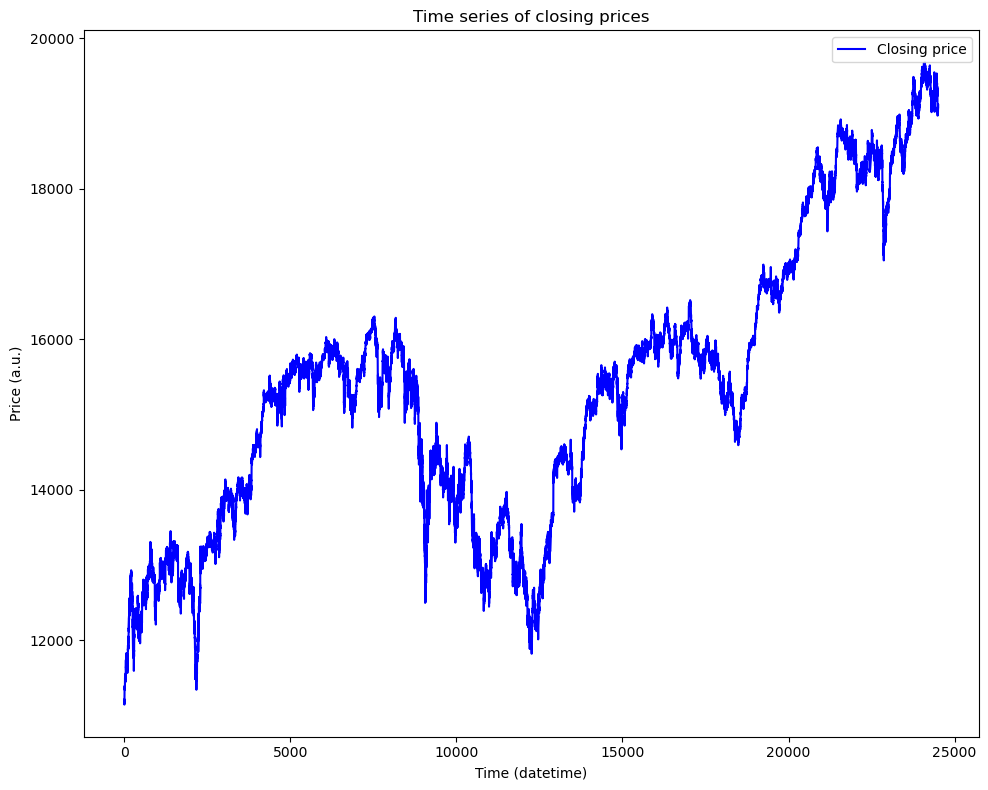

In [58]:
import meanreversion as mr
import numpy as np
import matplotlib.pyplot as plt

# let's start with four dataset
DAX = mr.load_asset("data/DAX_M15_202005242300_202411131015.csv")
DJ = mr.load_asset("data/DJ_M15_202009240845_202411131015.csv")
EURUSD = mr.load_asset("data/EURUSD_M15_202012241045_202412311745.csv")
FTSE = mr.load_asset("data/FTSE100_M15_201912230600_202411131015.csv")

# if we wanted to plot them, then
mr.draw_info(DAX)
# mr.draw_info(DAX, kind = "return") to plot the return

Let's try to work with this dataset (closing price). For example, let's just take half of the time series (the second one) and use it to test our function which detects trends

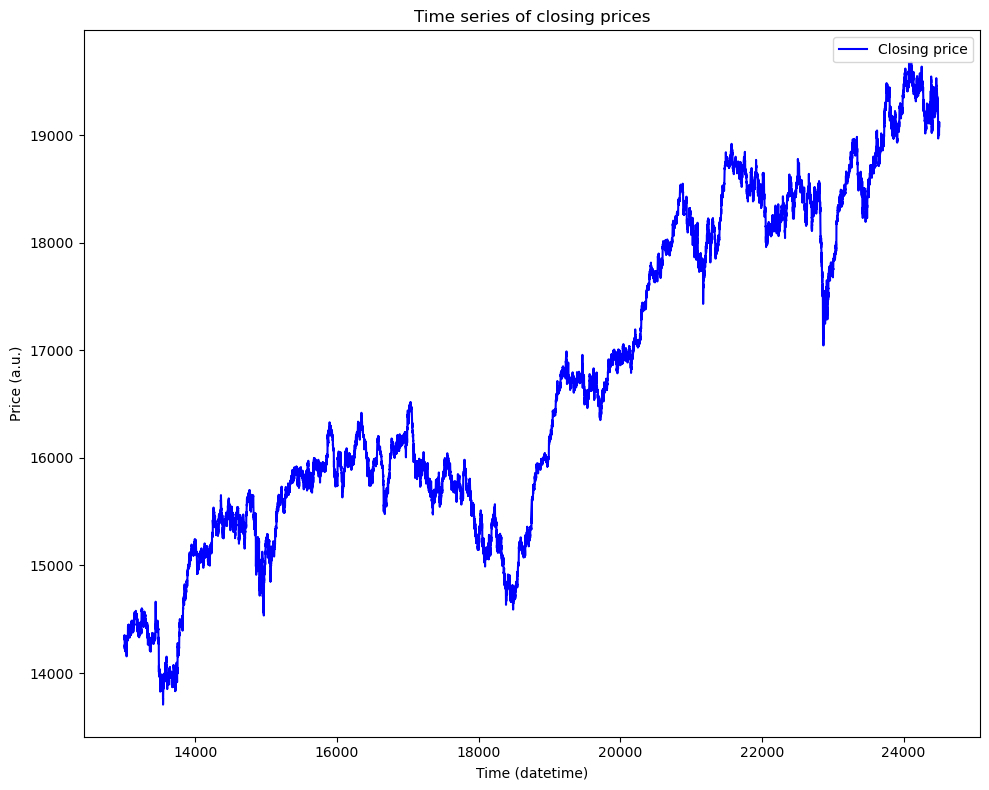

In [62]:
DAX_filtered = DAX.loc[13000:]
mr.draw_info(DAX_filtered)

0.8170118534889693
There is a trend in the time series.


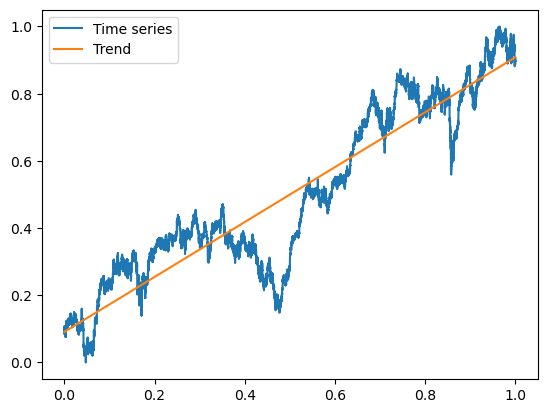

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def find_trend_mean(data : pd.DataFrame, ax = None ):
    """
    Find the trend of the data, if there is one
    """
    x = np.array(data.index).reshape(-1, 1)
    y = np.array(data["Close"])

    #normalize the data so that they are in the same range [0,1]
    y = y - y.min()
    y = y / y.max()

    x = x - x.min()
    x = x / x.max()

    model = LinearRegression()
    model.fit(x, y)

    # Coefficiente angolare (pendenza) e intercetta
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(x, y)

    if ax is not None:
        ax.plot(x, y, label = "Time series")
        ax.plot(x, slope*x + intercept, label = "Trend")
        ax.legend(loc='best')
    print(slope)

    if abs(slope) > 0.05 and r2 > 0.4:    #here we put some threshold, maybe put some work into identifying the best threshold
        print("There is a trend in the time series.")
    else:
        print("There is no trend in the time series.")


fig, ax = plt.subplots()
find_trend_mean(DAX_filtered, ax)